# Machine Learning Assignment

**imports**

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, log_loss, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

**Reading data**

In [2]:
df = pd.read_csv("84_Loeschcke_et_al_2000_Wing_traits_&_asymmetry_lab pops.csv")
print(f"{df.head()}\n")

# Count the number of null values in the entire datasheet
total_null_values = df.isnull().sum().sum()
print("Total number of null values in the dataset:", total_null_values)

for column in df:
    print(f"{df[column].describe()}\n")

      Species Population  Latitude  Longitude  Year_start  Year_end  \
0  D.aldrichi    Binjour    -25.52     151.45        1994      1994   
1  D.aldrichi    Binjour    -25.52     151.45        1994      1994   
2  D.aldrichi    Binjour    -25.52     151.45        1994      1994   
3  D.aldrichi    Binjour    -25.52     151.45        1994      1994   
4  D.aldrichi    Binjour    -25.52     151.45        1994      1994   

   Temperature  Vial  Replicate     Sex  Wing_area  Wing_shape  Wing_vein  \
0           20     1          1  female      1.223       2.296      2.597   
1           20     1          1    male      1.006       2.289      2.528   
2           20     1          2  female      1.149       2.340      2.580   
3           20     1          2    male      1.000       2.180      2.508   
4           20     2          1  female      1.160       2.275      2.589   

   Asymmetry_wing_area  Asymmetry_wing_shape  Asymmetry_wing_vein  
0                0.043                 0.0

In [3]:
# Find the maximum and minimum value for each column
max_values = df.max()
min_values = df.min()
print("\nMaximum values for each column:\n", max_values)
print("\nMinimum values for each column:\n", min_values)

# Find the standard deviation for each column
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Selecting only numeric columns so Spec can be taken out
std_deviation = numeric_df.std()
print("\nStandard deviation for each column:\n", std_deviation)


Maximum values for each column:
 Species                 D.buzzatii
Population                 Wahruna
Latitude                    -21.77
Longitude                   152.45
Year_start                    1994
Year_end                      1994
Temperature                     30
Vial                            10
Replicate                        3
Sex                           male
Wing_area                    1.301
Wing_shape                    2.42
Wing_vein                    2.963
Asymmetry_wing_area          0.113
Asymmetry_wing_shape         0.219
Asymmetry_wing_vein          0.425
dtype: object

Minimum values for each column:
 Species                 D.aldrichi
Population                 Binjour
Latitude                    -27.68
Longitude                   148.85
Year_start                    1994
Year_end                      1994
Temperature                     20
Vial                             1
Replicate                        1
Sex                         female
Wing_are

In [4]:
# Removing rows with missing values
df1 = df.dropna()
# Remove this column 
df2 = df1.drop("Year_start", axis='columns') 
df3 = df2.drop("Year_end", axis='columns') 
df4 = df3.drop("Latitude", axis='columns') 
cleaned_df = df4.drop("Longitude", axis='columns') 

total_null_values = cleaned_df.isnull().sum().sum()

print("Total number of null values in the dataset:", total_null_values)

Total number of null values in the dataset: 0


In [5]:
# Encoding non-numerical feature Spec
label_encoder = LabelEncoder()
cleaned_df['Species'] = label_encoder.fit_transform(cleaned_df['Species'])
cleaned_df['Population'] = label_encoder.fit_transform(cleaned_df['Population'])
cleaned_df['Sex'] = label_encoder.fit_transform(cleaned_df['Sex'])

print(f"{cleaned_df.head()}\n")

   Species  Population  Temperature  Vial  Replicate  Sex  Wing_area  \
0        0           0           20     1          1    0      1.223   
1        0           0           20     1          1    1      1.006   
2        0           0           20     1          2    0      1.149   
3        0           0           20     1          2    1      1.000   
4        0           0           20     2          1    0      1.160   

   Wing_shape  Wing_vein  Asymmetry_wing_area  Asymmetry_wing_shape  \
0       2.296      2.597                0.043                 0.010   
1       2.289      2.528                0.006                 0.018   
2       2.340      2.580                0.039                 0.053   
3       2.180      2.508                0.016                 0.007   
4       2.275      2.589                0.003                 0.005   

   Asymmetry_wing_vein  
0                0.028  
1                0.044  
2                0.140  
3                0.074  
4              

# Models

**pairplot**

In [6]:
# pairplot_df = cleaned_df[['Species', 'Population', 'Temperature', 'Vial', 'Replicate', 'Sex', 'Wing_area', 'Wing_vein', 'Wing_shape', 'Asymmetry_wing_area', 'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]

# Creating pair plot VERY BIG, Takes a long time to load
# sns.pairplot(pairplot_df) 

**Correlation Matrix of Wing_traits_&_asymmetry_lab pops After Cleaning**

Text(0.5, 1.0, 'Correlation Matrix of Wing_traits_&_asymmetry_lab pops After Cleaning')

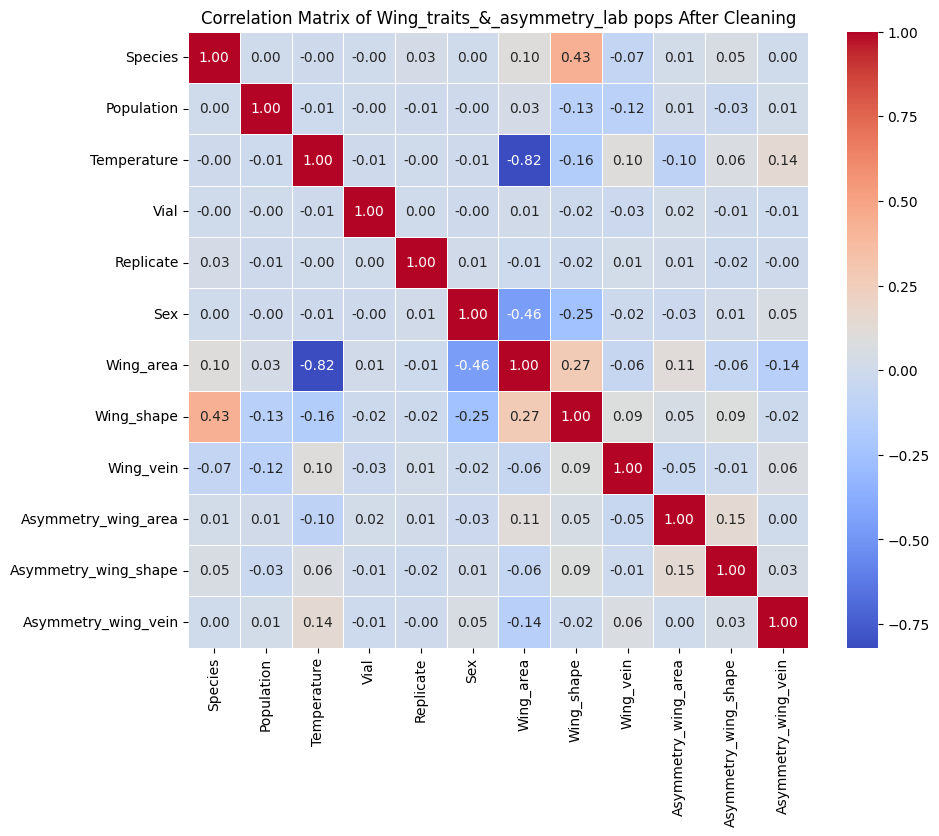

In [7]:
correlation_matrix = cleaned_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Wing_traits_&_asymmetry_lab pops After Cleaning")


**Create a new feature called Wing_area_to_vein_ratio**

In [8]:
cleaned_df['Wing_area_to_vein_ratio'] = cleaned_df['Wing_area'] / cleaned_df['Wing_vein']

print(f"{cleaned_df.head()}\n")

   Species  Population  Temperature  Vial  Replicate  Sex  Wing_area  \
0        0           0           20     1          1    0      1.223   
1        0           0           20     1          1    1      1.006   
2        0           0           20     1          2    0      1.149   
3        0           0           20     1          2    1      1.000   
4        0           0           20     2          1    0      1.160   

   Wing_shape  Wing_vein  Asymmetry_wing_area  Asymmetry_wing_shape  \
0       2.296      2.597                0.043                 0.010   
1       2.289      2.528                0.006                 0.018   
2       2.340      2.580                0.039                 0.053   
3       2.180      2.508                0.016                 0.007   
4       2.275      2.589                0.003                 0.005   

   Asymmetry_wing_vein  Wing_area_to_vein_ratio  
0                0.028                 0.470928  
1                0.044                 0

**3 pairs of scatter polot**

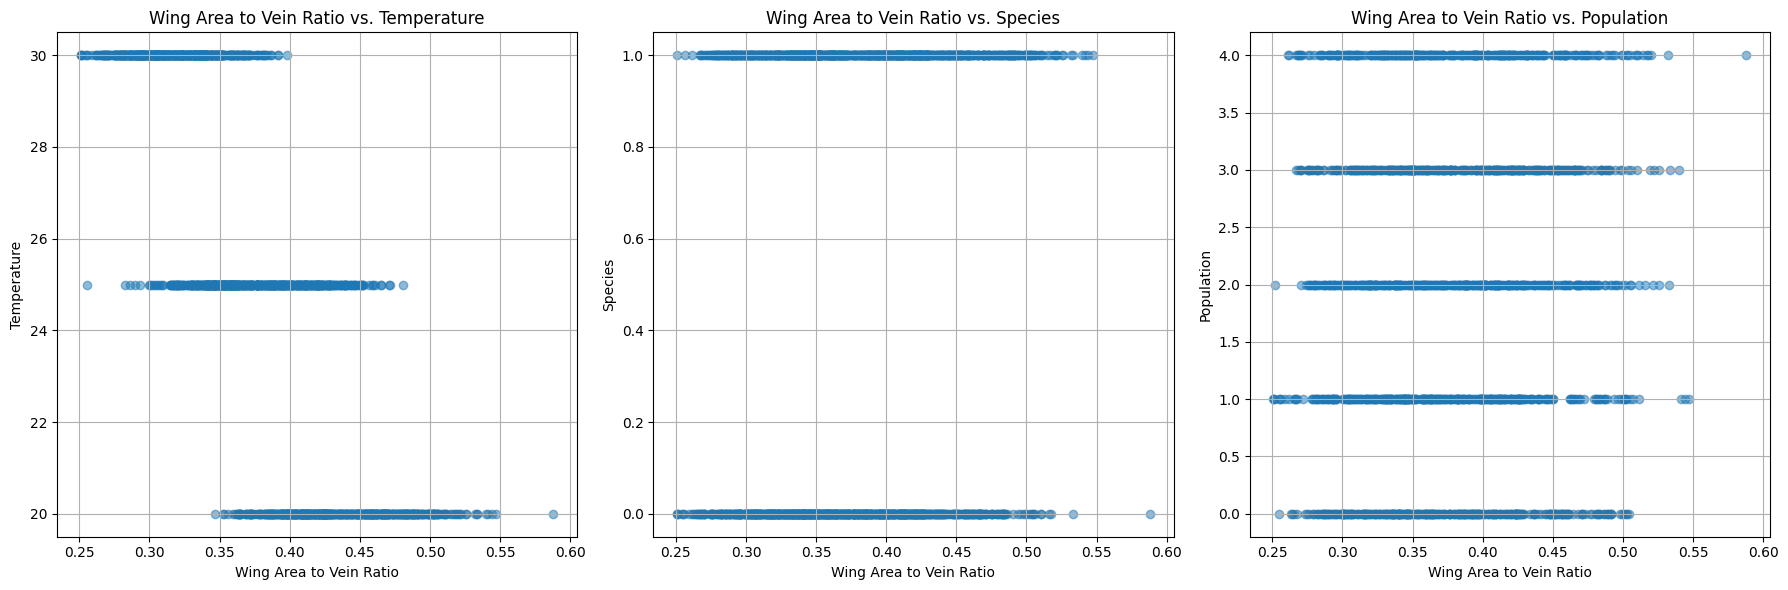

In [9]:
# 3 plots
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the scatter plot Wing_area_to_vein_ratio vs. Temperature
axes[0].scatter(cleaned_df['Wing_area_to_vein_ratio'], cleaned_df['Temperature'], alpha=0.5)
axes[0].set_title('Wing Area to Vein Ratio vs. Temperature')
axes[0].set_xlabel('Wing Area to Vein Ratio')
axes[0].set_ylabel('Temperature')
axes[0].grid(True)

# Plotting the scatter plot Wing_area_to_vein_ratio vs. Species
axes[1].scatter(cleaned_df['Wing_area_to_vein_ratio'], cleaned_df['Species'], alpha=0.5)
axes[1].set_title('Wing Area to Vein Ratio vs. Species')
axes[1].set_xlabel('Wing Area to Vein Ratio')
axes[1].set_ylabel('Species')
axes[1].grid(True)

# Plotting the scatter plot Wing_area_to_vein_ratio vs. Population
axes[2].scatter(cleaned_df['Wing_area_to_vein_ratio'], cleaned_df['Population'], alpha=0.5)
axes[2].set_title('Wing Area to Vein Ratio vs. Population')
axes[2].set_xlabel('Wing Area to Vein Ratio')
axes[2].set_ylabel('Population')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


**split data for machine training**

In [10]:
# Extracting features and target
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]
y = cleaned_df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardizing features

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Training the KNN classifier with different values of k
k_values = list(range(1, 400))  # Example values of k

train_accuracy = []
test_accuracy = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

**KNN model test Accuracy and Loss vs. Number of Neighbours (k)**

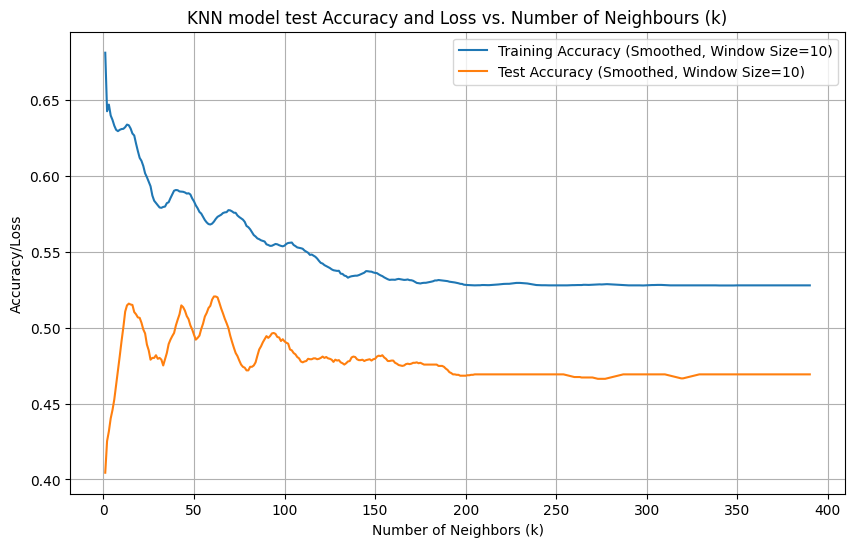

In [11]:
# Applying moving average to smooth the curve
window_size = 10  # Adjust this value to control the smoothness
smoothed_accuracy = np.convolve(train_accuracy, np.ones(window_size)/window_size, mode='valid')
smoothed_accuracy_test = np.convolve(test_accuracy, np.ones(window_size)/window_size, mode='valid')


# Plotting the smoothed accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values[:len(smoothed_accuracy)], smoothed_accuracy, label=f'Training Accuracy (Smoothed, Window Size={window_size})')
plt.plot(k_values[:len(smoothed_accuracy_test)], smoothed_accuracy_test, label=f'Test Accuracy (Smoothed, Window Size={window_size})')

plt.title('KNN model test Accuracy and Loss vs. Number of Neighbours (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.grid(True)
plt.show()


**Confusion Matrix (Train-Test Set) kNN**

Accuracy: 53.08%
Train-Test Set Confusion Matrix: 
[[ 5700 12400]
 [ 3600 12400]]
Precision: 55.99%
Recall: 53.08%
F1 Score: 50.6%


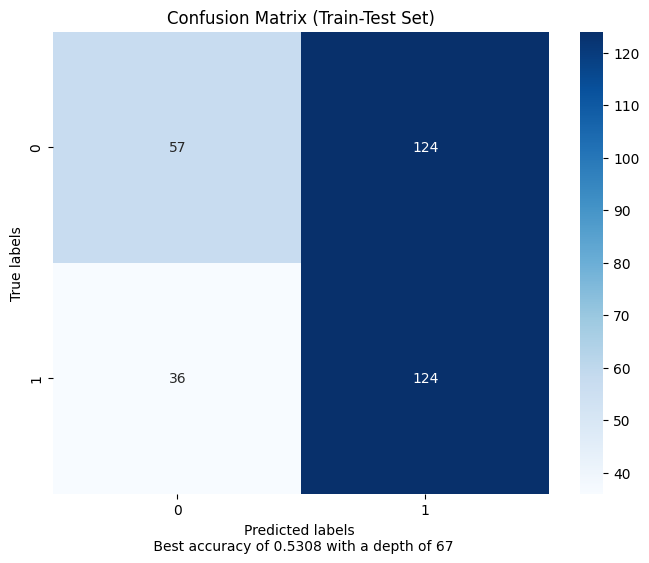

In [12]:
# Initialize KNN classifier with k=50

knn = KNeighborsClassifier(n_neighbors=50)

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = knn.predict(X_test)

# Compute the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Precision measures the accuracy of positive predictions
precision = precision_score(y_test, y_pred_test, average='weighted')
# Recall measures the completeness of positive predictions
recall = recall_score(y_test, y_pred_test, average='weighted')
# F1 score measures the harmonic mean of the precision and recall
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy: {np.around(accuracy*100, 2)}%") # 2 decimal place

print(f"Train-Test Set Confusion Matrix: \n{np.around(conf_matrix*100, 2)}") # 2 decimal place
print(f"Precision: {np.around(precision*100, 2)}%") # 2 decimal place
print(f"Recall: {np.around(recall*100, 2)}%") # 2 decimal place
print(f"F1 Score: {np.around(f1*100, 2)}%") # 2 decimal place

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
# 0.5308 50
plt.xlabel('Predicted labels \n Best accuracy of 0.5308 with a depth of 67')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Train-Test Set)')
plt.show()

**KNN model Cross-Validation Accuracy vs. Number of Neighbors (k)**


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\29448\AppData\Local\P

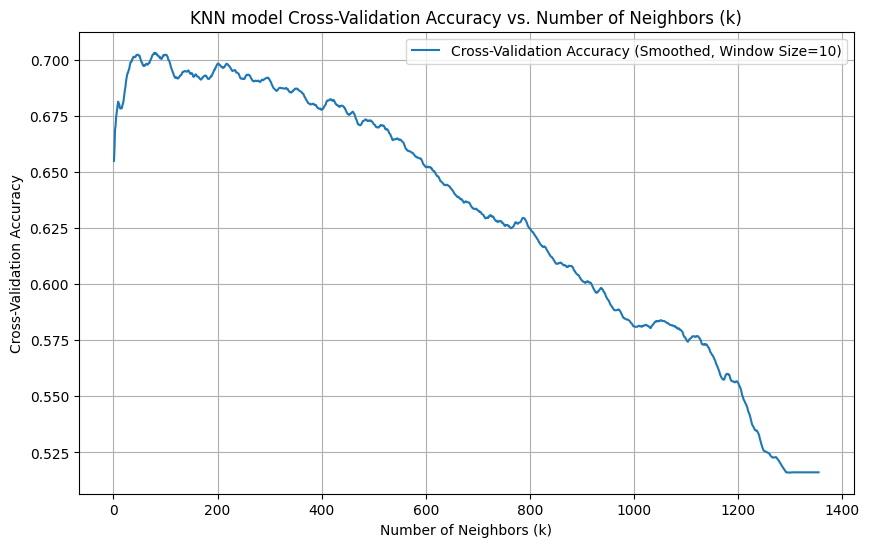

In [13]:
# Extracting features and target
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]
y = cleaned_df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardizing features

# Training the KNN classifier with different values of k
k_values = list(range(1, 1420))  # Example values of k 2000

train_accuracy = []

# Applying cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold cross-validation
    train_accuracy.append(scores.mean())

# Applying moving average to smooth the curve
window_size = 10  # Adjust this value to control the smoothness
smoothed_accuracy = np.convolve(train_accuracy, np.ones(window_size)/window_size, mode='valid')

# Plotting the smoothed accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values[:len(smoothed_accuracy)], smoothed_accuracy, label=f'Cross-Validation Accuracy (Smoothed, Window Size={window_size})')
plt.title('KNN model Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**Precision-Recall Curve for Each Class NOT USING YET**


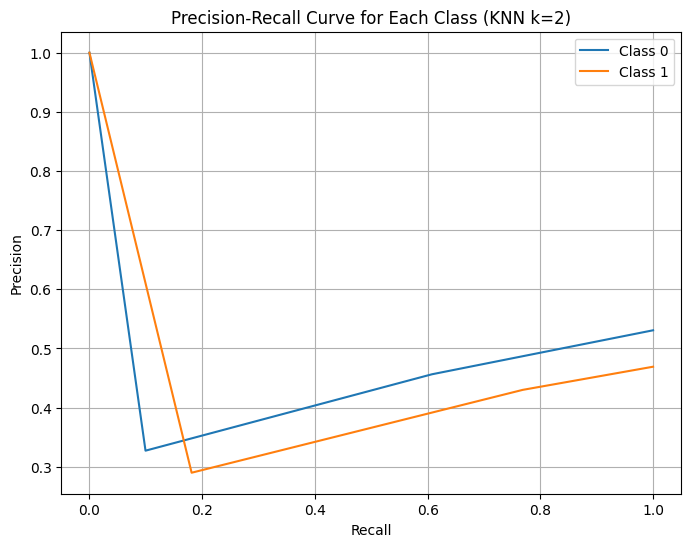

In [14]:
# Training the KNN classifier with k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Predict probabilities for each class
y_probs = knn.predict_proba(X_test)

# Plotting the Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class (KNN k=2)')
plt.legend()
plt.grid(True)
plt.show()

**Confusion Matrix (Cross-Validation) kNN**

Accuracy: 53.67%
Cross-Validation Confusion Matrix: 
[[71200 11300]
 [67700 20300]]
Precision: 57.96%
Recall: 53.67%
F1 Score: 48.64%


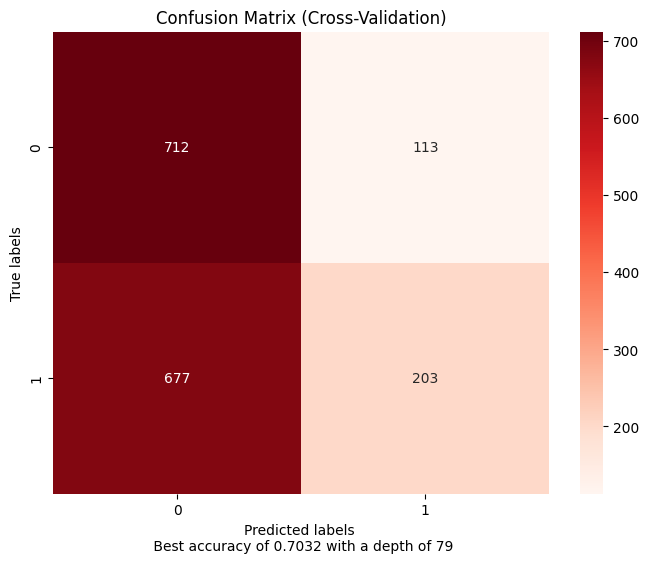

In [15]:
k_values = list(range(1, 1420))  # Example values of k

# Perform cross-validation
y_pred_cv = cross_val_predict(knn, X, y, cv=6)

# Compute the confusion matrix
conf_matrix_cv = confusion_matrix(y, y_pred_cv)

conf_matrix = confusion_matrix(y, y_pred_cv)
accuracy = accuracy_score(y, y_pred_cv)

# Precision measures the accuracy of positive predictions
precision = precision_score(y, y_pred_cv, average='weighted')
# Recall measures the completeness of positive predictions
recall = recall_score(y, y_pred_cv, average='weighted')
# F1 score measures the harmonic mean of the precision and recall
f1 = f1_score(y, y_pred_cv, average='weighted')

print(f"Accuracy: {np.around(accuracy*100, 2)}%") # 2 decimal place

print(f"Cross-Validation Confusion Matrix: \n{np.around(conf_matrix*100, 2)}") # 2 decimal place
print(f"Precision: {np.around(precision*100, 2)}%") # 2 decimal place
print(f"Recall: {np.around(recall*100, 2)}%") # 2 decimal place
print(f"F1 Score: {np.around(f1*100, 2)}%") # 2 decimal place

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Reds')
# accuracy of 0.6223 with a depth of 7
plt.xlabel('Predicted labels \n Best accuracy of 0.7032 with a depth of 79')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Cross-Validation)')
plt.show()

**Random Forest Model Graph**

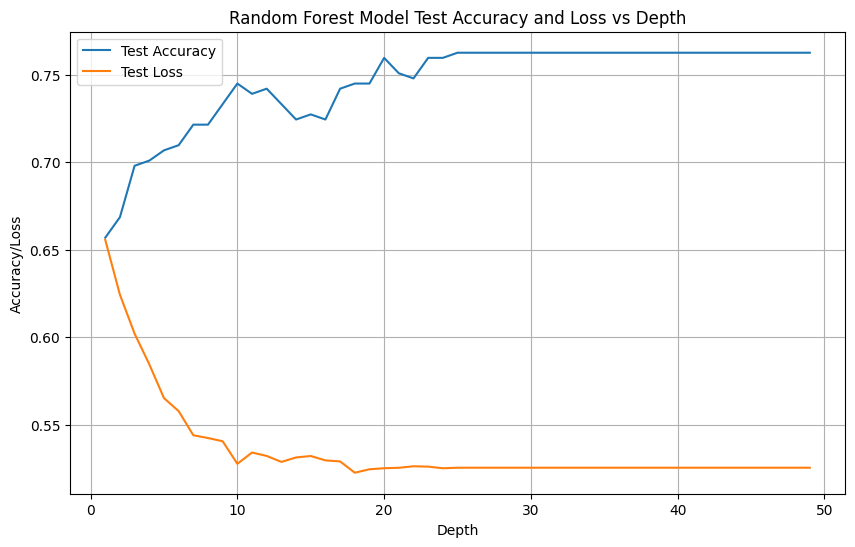

In [16]:
# Separate features (X) and target (y)
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]  # Features
y = cleaned_df['Species']  # Target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
random_forest.fit(X_train, y_train)

# Predictions on the test set
y_pred = random_forest.predict(X_test)

# Initialize lists to store accuracy and loss values
depth_values = []
test_accuracy = []
test_loss = []

# Iterate over different depths
for depth in range(1, 50):
    # Initialize Random Forest classifier with specific depth
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    random_forest.fit(X_train, y_train)
    
    # Predictions
    y_pred = random_forest.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate loss
    loss = log_loss(y_test, random_forest.predict_proba(X_test))
    
    # Append values to the lists
    depth_values.append(depth)
    test_accuracy.append(accuracy)
    test_loss.append(loss)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depth_values, test_accuracy, label='Test Accuracy')
plt.plot(depth_values, test_loss, label='Test Loss')
plt.title('Random Forest Model Test Accuracy and Loss vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest Model Test Accuracy and Loss vs Depth Graph**

Accuracy: 0.7624633431085044
Confusion Matrix:
 [[129  52]
 [ 29 131]]


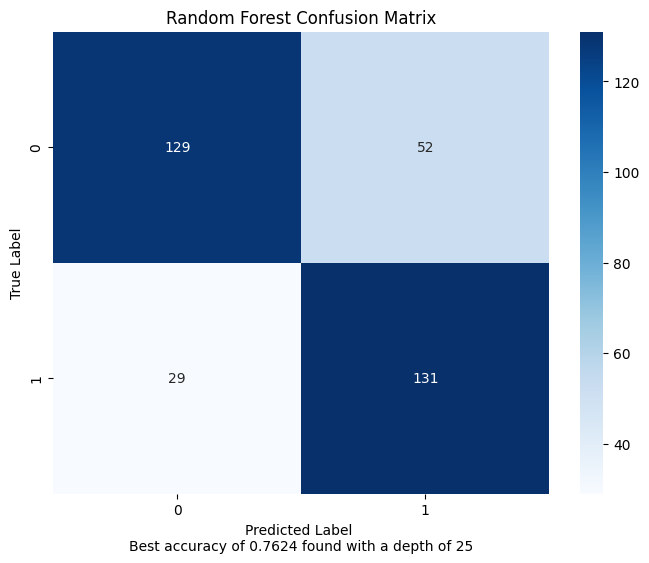

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

max_accuracy = np.max(accuracy)

print("Accuracy:", max_accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Random forest Confusion Matrix Graph
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label \nBest accuracy of 0.7624 found with a depth of 25')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

**Random forest Cross-Validation**

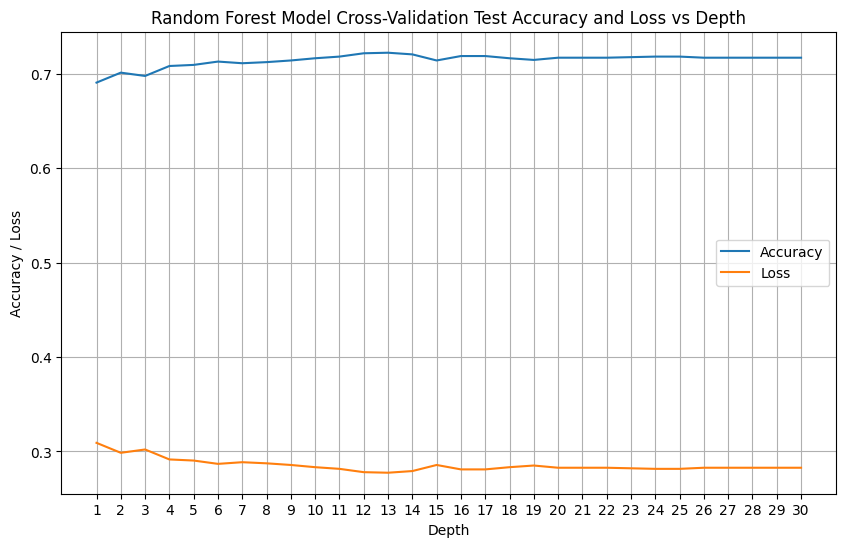

In [18]:
# Separate features (X) and target (y)
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]  # Features
y = cleaned_df['Species']  # Target

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation and make predictions
y_pred_cv = cross_val_predict(rf_model, X, y, cv=6)

# Define range of depths to test
depth_values = range(1, 31)

# Initialize lists to store accuracy and loss values
accuracy_scores = []
loss_scores = []

# Iterate over different depth values
for depth in depth_values:
    # Define the Random Forest model with specified depth
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    
    # Perform cross-validation to obtain accuracy
    accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()
    
    # Append accuracy to the list
    accuracy_scores.append(accuracy)
    
    # Calculate loss (1 - accuracy)
    loss = 1 - accuracy
    
    # Append loss to the list
    loss_scores.append(loss)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depth_values, accuracy_scores, label='Accuracy')
plt.plot(depth_values, loss_scores, label='Loss')
plt.title('Random Forest Model Cross-Validation Test Accuracy and Loss vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(depth_values), max(depth_values)+1, 1.0))
plt.show()

**Random Forest Model Test Accuracy and Loss vs Depth Cross-Validation**

Accuracy: 0.7225806451612903
Confusion Matrix:
 [[540 285]
 [188 692]]


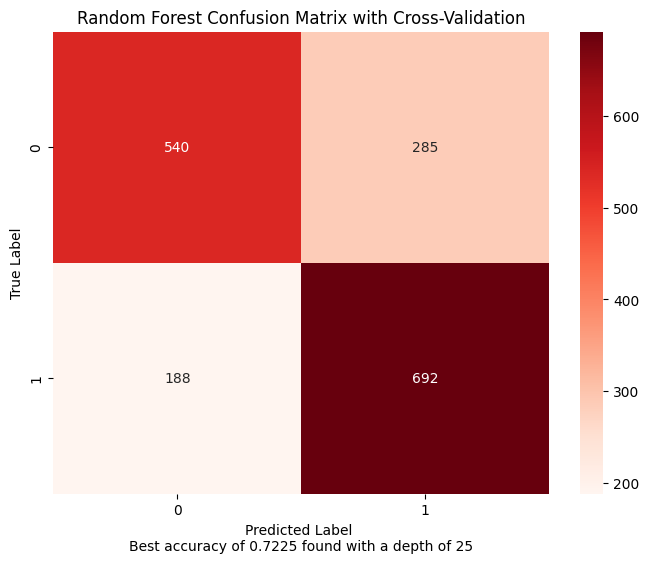

In [19]:
# Compute the confusion matrix
conf_matrix_cv = confusion_matrix(y, y_pred_cv)

accuracy = accuracy_score(y, y_pred_cv)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_cv)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted Label \nBest accuracy of 0.7225 found with a depth of 25')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix with Cross-Validation')
plt.show()

**Logistic Regression Model**

C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

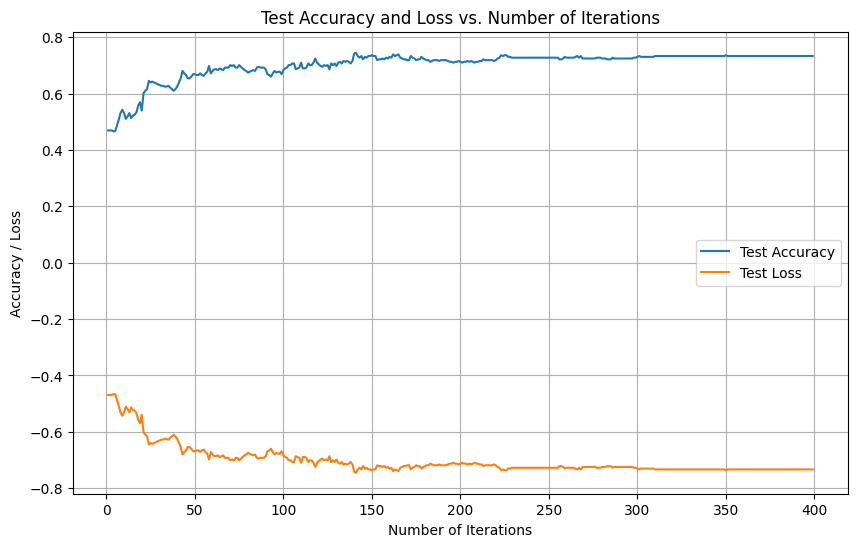

In [20]:
# Separate features (X) and target (y)
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]  # Features
y = cleaned_df['Species']  # Target


accuracy_list = []
loss_list = []
num_iterations = range(1, 400)

for num_iter in num_iterations:
    # Initialize and train the logistic regression model
    model = LogisticRegression(max_iter=num_iter)
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    accuracy = model.score(X_test, y_test)
    loss = -1 * model.score(X_test, y_test)
    
    # Append the accuracy and loss to the lists
    accuracy_list.append(accuracy)
    loss_list.append(loss)

# Plotting the test accuracy and loss vs number of iterations
plt.figure(figsize=(10, 6))
plt.plot(num_iterations, accuracy_list, label='Test Accuracy')
plt.plot(num_iterations, loss_list, label='Test Loss')
plt.title('Test Accuracy and Loss vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.7331378299120235
Confusion Matrix:
 [[125  56]
 [ 35 125]]


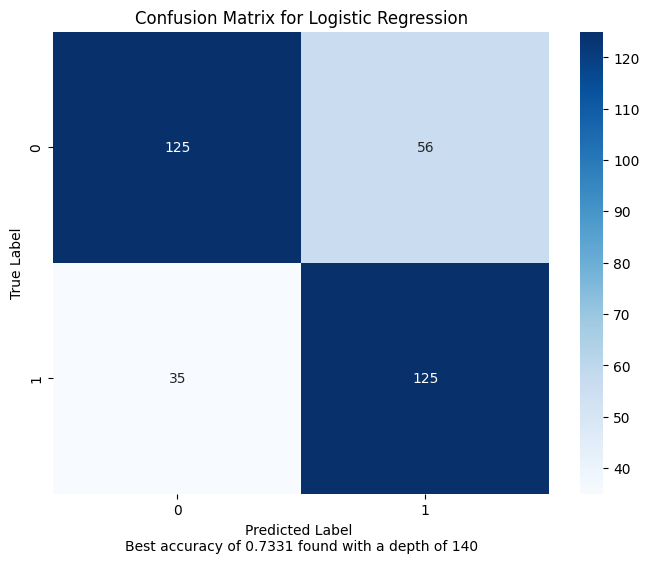

In [21]:
# Separate features (X) and target (y)
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]  # Features
y = cleaned_df['Species']  # Target

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Logistic Regression Model
glm = LogisticRegression()
glm.fit(X_train_scaled, y_train)

# Predictions
y_pred = glm.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label \nBest accuracy of 0.7331 found with a depth of 140')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Logistic Regression Model with Cross-Validation**

C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

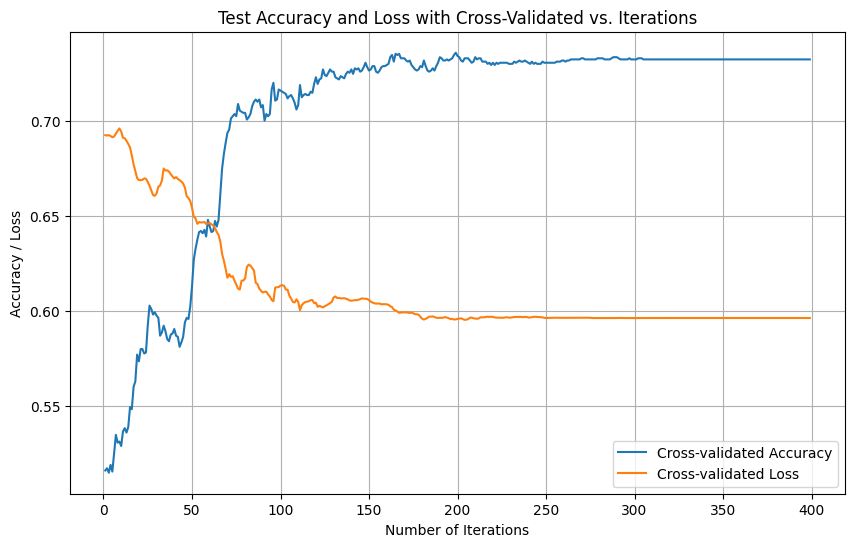

In [22]:
# Separate features (X) and target (y)
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]  # Features
y = cleaned_df['Species']  # Target

num_iterations = range(1, 400)

# Initialize lists to store cross-validated accuracy and loss
cv_scores_accuracy = []
cv_scores_loss = []

for max_iter in num_iterations:
    # Create Logistic Regression model with current maximum iteration
    log_reg_model = LogisticRegression(max_iter=max_iter)
    
    # Perform cross-validation
    cv_accuracy = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy').mean()
    cv_loss = -cross_val_score(log_reg_model, X, y, cv=5, scoring='neg_log_loss').mean()  # negative sign for log loss
    
    # Append the cross-validated accuracy and loss to the lists
    cv_scores_accuracy.append(cv_accuracy)
    cv_scores_loss.append(cv_loss)

# Plotting the cross-validated accuracy and loss
plt.figure(figsize=(10, 6))
plt.plot(num_iterations, cv_scores_accuracy, label='Cross-validated Accuracy')
plt.plot(num_iterations, cv_scores_loss, label='Cross-validated Loss')
plt.title('Test Accuracy and Loss with Cross-Validated vs. Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy / Loss')
plt.grid(True)
plt.legend()
plt.show()


**Logistic Regression Model with Cross-Validation Confusion Matrix**

Cross-validation accuracy: 0.8592375366568915
Confusion Matrix:
 [[540 285]
 [188 692]]


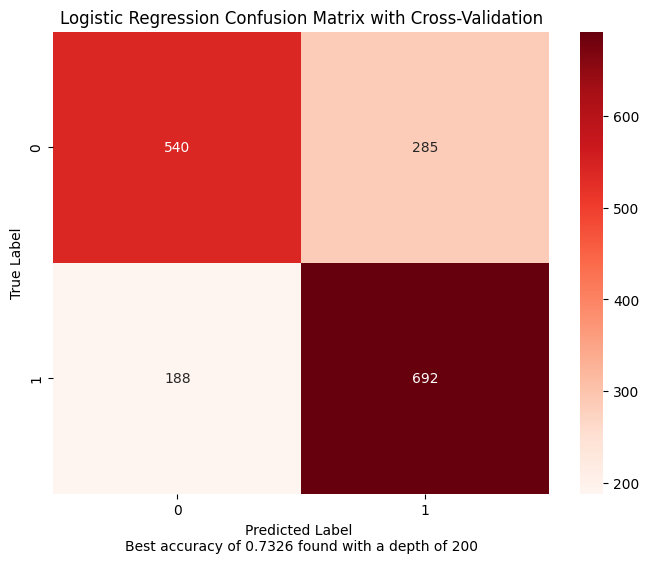

In [23]:
log_reg_model = LogisticRegression(max_iter=400)  # Increase max_iter if necessary

# Perform cross-validation
cv_accuracy = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')
# Compute the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)


# Print the cross-validation accuracy
print("Cross-validation accuracy:", cv_accuracy.max())
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label \nBest accuracy of 0.7326 found with a depth of 200')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix with Cross-Validation')
plt.show()


**Neural Network Model**

Epoch 1/200


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5524 - loss: 0.6675 - val_accuracy: 0.6850 - val_loss: 0.6155
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7231 - loss: 0.5954 - val_accuracy: 0.7253 - val_loss: 0.5692
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7421 - loss: 0.5353 - val_accuracy: 0.7546 - val_loss: 0.5398
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7570 - loss: 0.4964 - val_accuracy: 0.7692 - val_loss: 0.5196
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7607 - loss: 0.4695 - val_accuracy: 0.7692 - val_loss: 0.5039
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.4826 - val_accuracy: 0.7802 - val_loss: 0.4926
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4384 - val_accuracy: 0.7436 - val_loss: 0.4915
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7962 - loss: 0.4393 - val_accuracy: 0.7656 - val_loss: 0.4

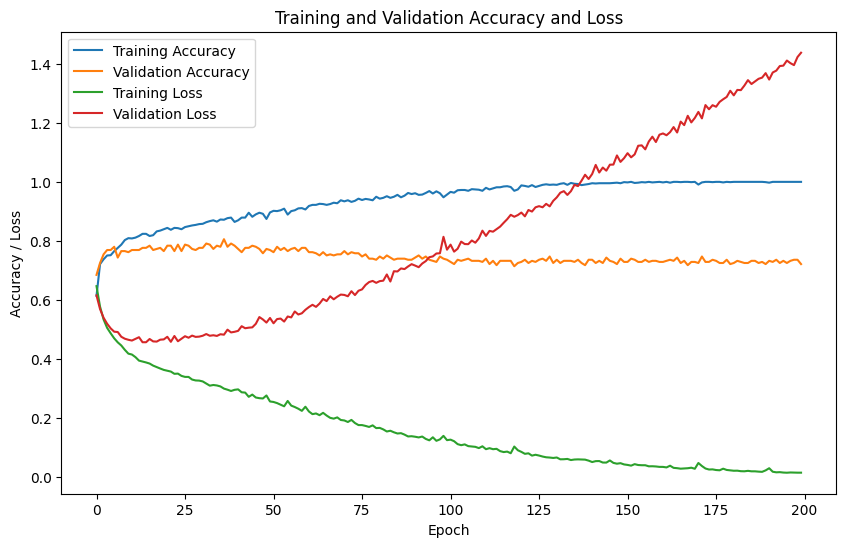

In [24]:
# Separate features (X) and target (y)
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]  # Features
y = cleaned_df['Species']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

plt.figure(figsize=(10, 6))
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy and Loss')
plt.show()


**Neural Network Model Confussion Matrix**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[133  48]
 [ 35 125]]
Test Accuracy: 0.7565982341766357


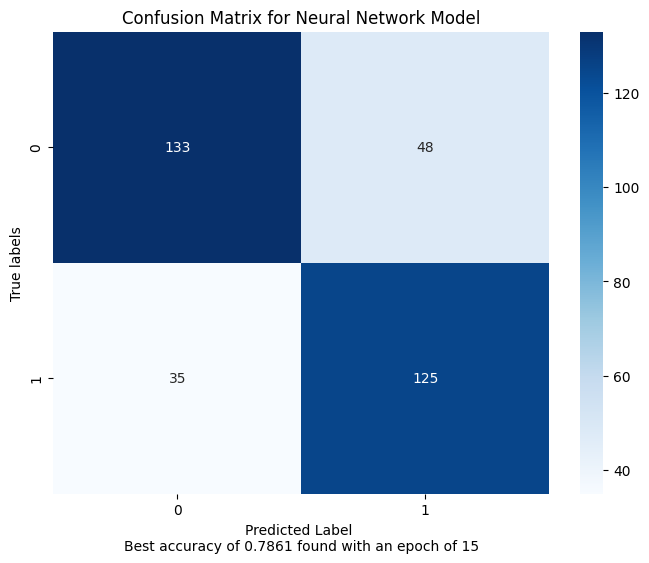

In [25]:
# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5)

# Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print(conf_matrix)
print(f'Test Accuracy: {test_accuracy}')

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label \nBest accuracy of 0.7861 found with an epoch of 15')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Neural Network Model')
plt.show()


**Neural Network Model with Cross-Validation**

C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Cross-Validation Accuracy: 0.788856315612793
Cross-Validation Loss: 0.4798275589942932


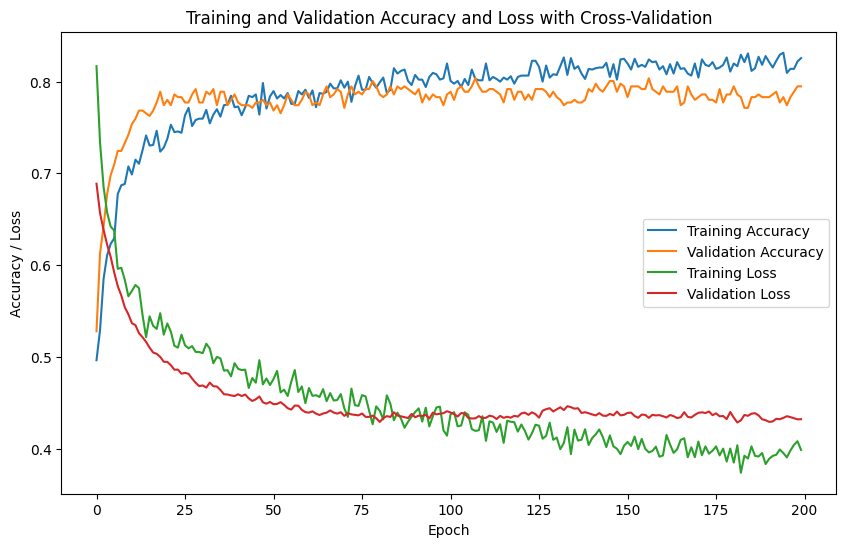

In [26]:
# Separate features and target
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]
y = cleaned_df['Species']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the neural network model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(y_encoded.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_accuracies = []
val_losses = []
conf_matrices = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    model = create_model()
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)
    
    y_val_pred = model.predict(X_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val, axis=1)
    conf_matrices.append(confusion_matrix(y_val_true_classes, y_val_pred_classes))

# Average validation accuracy and loss
mean_val_accuracy = np.mean(val_accuracies)
mean_val_loss = np.mean(val_losses)

print(f'Cross-Validation Accuracy: {mean_val_accuracy}')
print(f'Cross-Validation Loss: {mean_val_loss}')

plt.figure(figsize=(10, 6))
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy and Loss with Cross-Validation')
plt.show()


**Neural Network Model Confussion Matrix with Cross-Validation**

[[128.8  36.2]
 [ 35.8 140.2]]
Cross-Validation Accuracy: 0.803519070148468


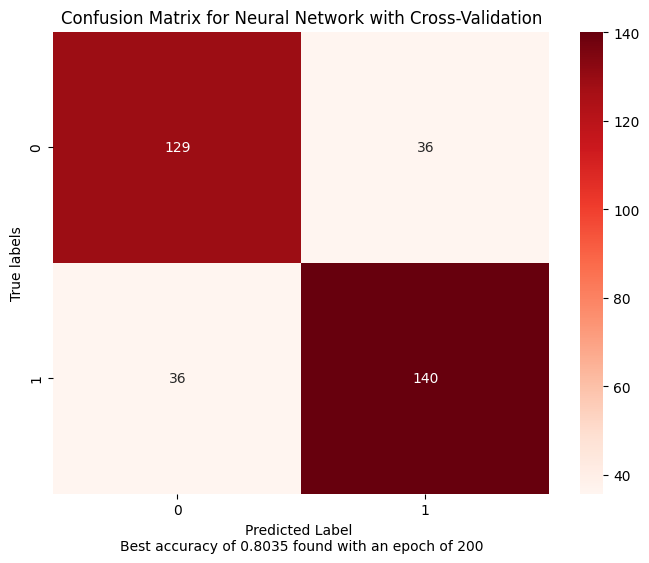

In [98]:
# Average confusion matrix
mean_conf_matrix = np.mean(conf_matrices, axis=0)
print(mean_conf_matrix)

# Max validation accuracy 
max_val_accuracy = np.max(val_accuracies)

print(f'Cross-Validation Accuracy: {max_val_accuracy}')

# Plotting the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".0f", cmap='Reds')
plt.title('Confusion Matrix for Neural Network with Cross-Validation')
plt.xlabel('Predicted Label \nBest accuracy of 0.8035 found with an epoch of 200')
plt.ylabel('True labels')
plt.show()

**Cross-Validation Training and Validation Accuracy and Loss with Regularisation**

C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Cross-Validation Accuracy with Regularization: 0.8064516186714172


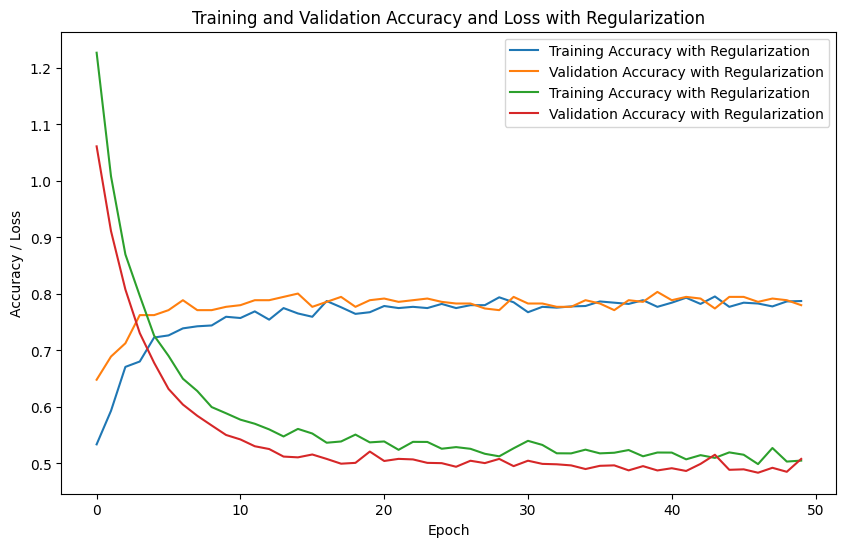

In [28]:
from keras.regularizers import l2

# Define the neural network model with L2 regularisation
def create_model_with_regularization():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(y_encoded.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup with regularisation
val_accuracies_reg = []
val_losses_reg = []
conf_matrices_reg = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    model_reg = create_model_with_regularization()
    history_reg = model_reg.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), verbose=0)
    
    val_loss_reg, val_accuracy_reg = model_reg.evaluate(X_val, y_val, verbose=0)
    val_accuracies_reg.append(val_accuracy_reg)
    val_losses_reg.append(val_loss_reg)
    
    y_val_pred_reg = model_reg.predict(X_val)
    y_val_pred_classes_reg = np.argmax(y_val_pred_reg, axis=1)
    y_val_true_classes_reg = np.argmax(y_val, axis=1)
    conf_matrices_reg.append(confusion_matrix(y_val_true_classes_reg, y_val_pred_classes_reg))

# Max validation accuracy and loss with regularisation
max_val_accuracy_reg = np.max(val_accuracies_reg)

print(f'Cross-Validation Accuracy with Regularisation: {max_val_accuracy_reg}')

plt.figure(figsize=(10, 6))
# Plot accuracy with regularisation
plt.plot(history_reg.history['accuracy'], label='Training Accuracy with Regularisation')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy with Regularisation')

plt.plot(history_reg.history['loss'], label='Training Accuracy with Regularisation')
plt.plot(history_reg.history['val_loss'], label='Validation Accuracy with Regularisation')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training and Validation Accuracy and Loss with Regularisation')
plt.show()

**Training and Validation Accuracy and Loss with Regularisation Confusion Matrix**

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
Max Cross-Validation Accuracy with Regularization: 0.8169013857841492
[[106.          31.5       ]
 [ 27.5        119.16666667]]


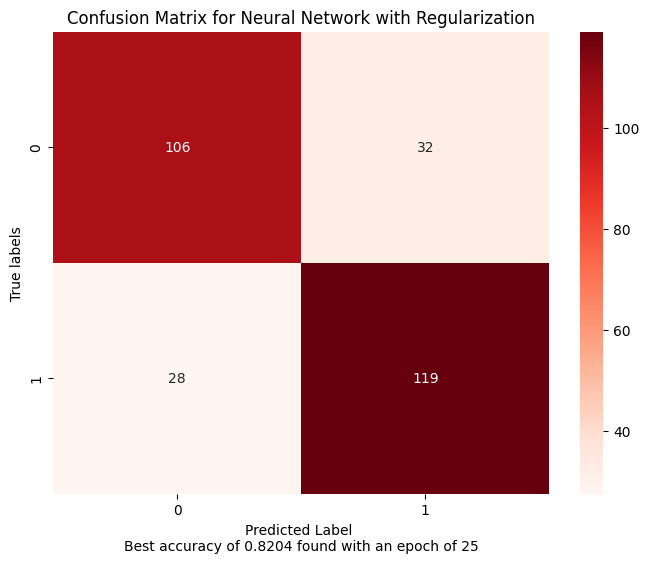

In [32]:
from keras.regularizers import l2

# Define the neural network model with L2 regularisation
def create_model_with_regularization():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(y_encoded.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup with regularisation
kf = KFold(n_splits=6, shuffle=True, random_state=42)
val_accuracies_reg = []
val_losses_reg = []
conf_matrices_train = []
conf_matrices_val = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    model_reg = create_model_with_regularization()
    history_reg = model_reg.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluate on validation set
    val_loss_reg, val_accuracy_reg = model_reg.evaluate(X_val, y_val, verbose=0)
    val_accuracies_reg.append(val_accuracy_reg)
    val_losses_reg.append(val_loss_reg)
    
    # Predict on validation set
    y_val_pred_reg = model_reg.predict(X_val)
    y_val_pred_classes_reg = np.argmax(y_val_pred_reg, axis=1)
    y_val_true_classes_reg = np.argmax(y_val, axis=1)
    conf_matrices_val.append(confusion_matrix(y_val_true_classes_reg, y_val_pred_classes_reg))
    
    # Predict on training set
    y_train_pred_reg = model_reg.predict(X_train)
    y_train_pred_classes_reg = np.argmax(y_train_pred_reg, axis=1)
    y_train_true_classes_reg = np.argmax(y_train, axis=1)
    conf_matrices_train.append(confusion_matrix(y_train_true_classes_reg, y_train_pred_classes_reg))

# Average confusion matrices
mean_conf_matrix_val = np.mean(conf_matrices_val, axis=0)

# Average validation accuracy and loss with regularisation
max_val_accuracy_reg = np.max(val_accuracies_reg)

print(f'Max Cross-Validation Accuracy with Regularisation: {max_val_accuracy_reg}')

print(mean_conf_matrix_val)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_val, annot=True, fmt=".0f", cmap='Reds')
plt.title('Confusion Matrix for Neural Network with Regularisation')
plt.xlabel('Predicted Label \nBest accuracy of 0.8204 found with an epoch of 25')
plt.ylabel('True labels')
plt.show()

**Cross-Validation Training and Validation Accuracy and Loss with Bayesian optimisation**

|   iter    |  target   | dropou... | learni... |
-------------------------------------------------


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 1         | 0.7859    | 0.2498    | 0.009508  |
| 2         | 0.7842    | 0.3928    | 0.005991  |
| 3         | 0.7895    | 0.1624    | 0.001568  |
| 4         | 0.7812    | 0.1232    | 0.008663  |
| 5         | 0.7824    | 0.3404    | 0.007084  |
| 6         | 0.7724    | 0.1082    | 0.009699  |
| 7         | 0.7818    | 0.433     | 0.002131  |
| 8         | 0.7713    | 0.1727    | 0.001842  |
| 9         | 0.783     | 0.2217    | 0.005252  |
| 10        | 0.783     | 0.2728    | 0.002919  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 11        | 0.7742    | 0.3404    | 0.007059  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 12        | 0.7766    | 0.3929    | 0.006057  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 13        | 0.776     | 0.2217    | 0.005224  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 14        | 0.783     | 0.3929    | 0.005952  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 15        | 0.7742    | 0.3927    | 0.005961  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 16        | 0.7818    | 0.1625    | 0.001567  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 17        | 0.7848    | 0.1234    | 0.008585  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 18        | 0.7889    | 0.1623    | 0.001554  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 19        | 0.7719    | 0.3404    | 0.007209  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 20        | 0.7877    | 0.3761    | 0.001233  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 21        | 0.783     | 0.1625    | 0.001648  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 22        | 0.7789    | 0.4171    | 0.008841  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 23        | 0.7871    | 0.376     | 0.001265  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 24        | 0.7695    | 0.2499    | 0.009573  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 25        | 0.7807    | 0.1623    | 0.001531  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 26        | 0.7859    | 0.433     | 0.002253  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 27        | 0.7789    | 0.3928    | 0.006035  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 28        | 0.7818    | 0.376     | 0.001272  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 29        | 0.7771    | 0.1232    | 0.008725  |


C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 30        | 0.7695    | 0.2498    | 0.009342  |
Best Hyperparameters:
  Dropout Rate: 0.1624074561769746
  Learning Rate: 0.0015683852581586646
Best Cross-Validation Accuracy: 0.7894551455974579


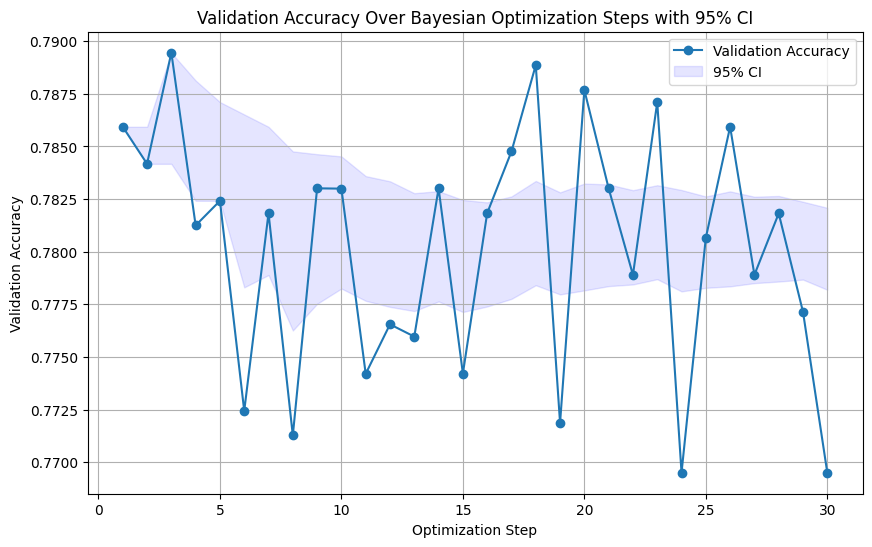

In [94]:
from bayes_opt import BayesianOptimization
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from keras.utils import to_categorical

# Assuming cleaned_df is your DataFrame with the features and target
# Separate features and target
X = cleaned_df[['Wing_area_to_vein_ratio', 'Population', 'Temperature', 'Vial', 'Replicate', 
                'Sex', 'Wing_area', 'Wing_shape', 'Wing_vein', 'Asymmetry_wing_area', 
                'Asymmetry_wing_shape', 'Asymmetry_wing_vein']]
y = cleaned_df['Species']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the search space
pbounds = {'dropout_rate': (0.1, 0.5),
           'learning_rate': (1e-5, 1e-2)}

# Define the function to optimize
def optimize_model(dropout_rate, learning_rate):
    # Define the neural network model with variable hyperparameters
    def create_model():
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X.shape[1],)),
            Dropout(dropout_rate),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(y_encoded.shape[1], activation='softmax')
        ])
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    # Cross-validation setup with early stopping
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    val_accuracies = []

    for train_index, val_index in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_encoded[train_index], y_encoded[val_index]

        model = create_model()
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val),
                            callbacks=[early_stopping], verbose=0)

        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        val_accuracies.append(val_accuracy)

    # Return the mean validation accuracy as the optimisation target
    return np.mean(val_accuracies)

# Store the progress of Bayesian Optimisation
validation_accuracies = []

# Perform Bayesian optimisation
optimizer = BayesianOptimization(f=optimize_model, pbounds=pbounds, random_state=42, verbose=2)
optimizer.maximize(init_points=10, n_iter=20)

# Collect validation accuracies at each step
for res in optimizer.res:
    validation_accuracies.append(res['target'])

# Get the best hyperparameters
best_params = optimizer.max['params']
best_dropout_rate = best_params['dropout_rate']
best_learning_rate = best_params['learning_rate']

print("Best Hyperparameters:")
print(f"  Dropout Rate: {best_dropout_rate}")
print(f"  Learning Rate: {best_learning_rate}")

# Print the best accuracy
best_accuracy = optimizer.max['target']
print(f"Best Cross-Validation Accuracy: {best_accuracy}")

# Calculate confidence intervals using bootstrap method
def bootstrap_confidence_interval(data, num_samples=1000, alpha=0.05):
    """Compute the confidence interval using bootstrap resampling."""
    bootstrapped_means = []
    n = len(data)
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrapped_means.append(np.mean(sample))
    lower_bound = np.percentile(bootstrapped_means, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrapped_means, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

lower_bounds = []
upper_bounds = []

for i in range(len(validation_accuracies)):
    lower_bound, upper_bound = bootstrap_confidence_interval(validation_accuracies[:i + 1])
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Plot the validation accuracies with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, marker='o', label='Validation Accuracy')
plt.fill_between(range(1, len(validation_accuracies) + 1), lower_bounds, upper_bounds, color='b', alpha=0.1, label='95% CI')
plt.title('Validation Accuracy Over Bayesian Optimisation Steps with 95% CI')
plt.xlabel('Optimisation Step')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Given confusion matrix
TP = 811
FP = 14
FN = 355
TN = 525

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.983030303030303
Recall: 0.6955403087478559
F1 Score: 0.8146659969864389
Accuracy: 0.7835777126099707


**Cross-Validation Training and Validation Accuracy and Loss with Bayesian Optimisation Confusion Matrix**

C:\Users\29448\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.803519070148468
[[810  15]
 [347 533]]


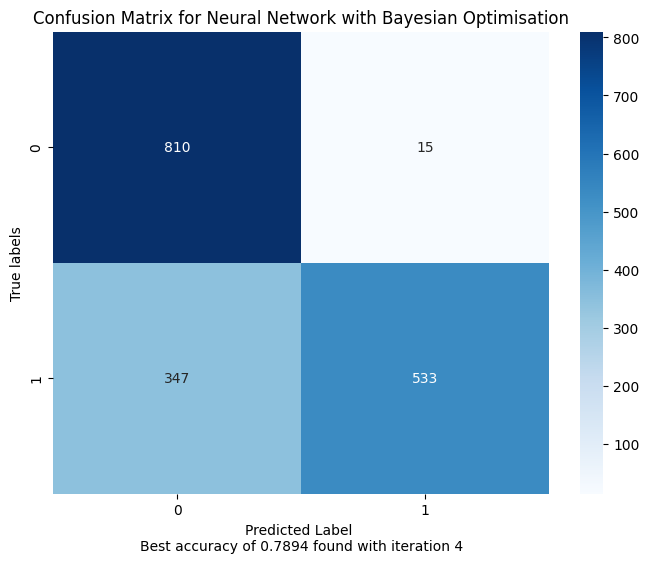

In [102]:
# Define the neural network model with the best hyperparameters
def create_best_model(dropout_rate=best_dropout_rate, learning_rate=best_learning_rate):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(y_encoded.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model on the entire training data and evaluate on the test data
best_model = create_best_model()
history = best_model.fit(X_scaled, y_encoded, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Predict on the entire dataset (to get confusion matrix for training and validation)
y_pred_train_val = best_model.predict(X_scaled)
y_pred_train_val_classes = np.argmax(y_pred_train_val, axis=1)
y_true_train_val_classes = np.argmax(y_encoded, axis=1)

# Create confusion matrix
conf_matrix_train_val = confusion_matrix(y_true_train_val_classes, y_pred_train_val_classes)

max_accuracy = np.max(val_accuracies)
print("Accuracy:", max_accuracy)

print(conf_matrix_train_val)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_val, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label \nBest accuracy of 0.7894 found with iteration 4')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Neural Network with Bayesian Optimisation')
plt.show()

In [101]:
# Given confusion matrix
TP = 106
FP = 31.5
FN = 27.5
TN = 119.16666667

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.7709090909090909
Recall: 0.7940074906367042
F1 Score: 0.7822878228782287
Accuracy: 0.7923753665713504


In [103]:
# Given confusion matrix
TP = 811
FP = 14
FN = 355
TN = 525

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.983030303030303
Recall: 0.6955403087478559
F1 Score: 0.8146659969864389
Accuracy: 0.7835777126099707


In [105]:
# Given confusion matrix (rounded to nearest integer)
TP = 129
FP = 36
FN = 36
TN = 140

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.7818181818181819
Recall: 0.7818181818181819
F1 Score: 0.7818181818181819
Accuracy: 0.7888563049853372
